In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
covid_df = pd.read_csv("country_wise_latest.csv")

In [3]:
# Set seaborn style
sns.set(style="whitegrid")

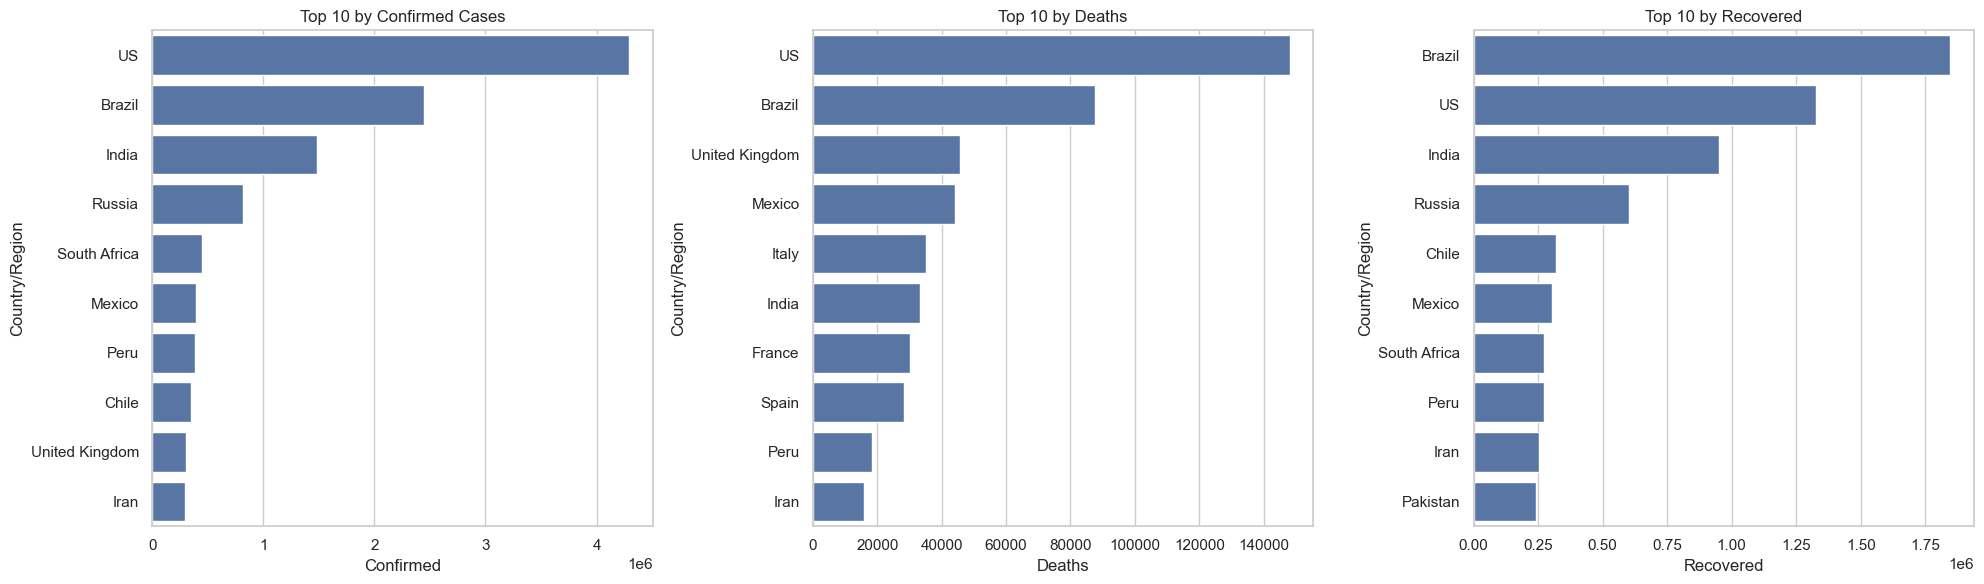

In [4]:
# 1. Top 10 Countries by Confirmed, Deaths, Recovered
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

for ax, col, title in zip(axs, ['Confirmed', 'Deaths', 'Recovered'],
                          ['Top 10 by Confirmed Cases', 'Top 10 by Deaths', 'Top 10 by Recovered']):
    top10 = covid_df.nlargest(10, col)
    sns.barplot(x=col, y='Country/Region', data=top10, ax=ax)
    ax.set_title(title)

plt.tight_layout()
plt.show()

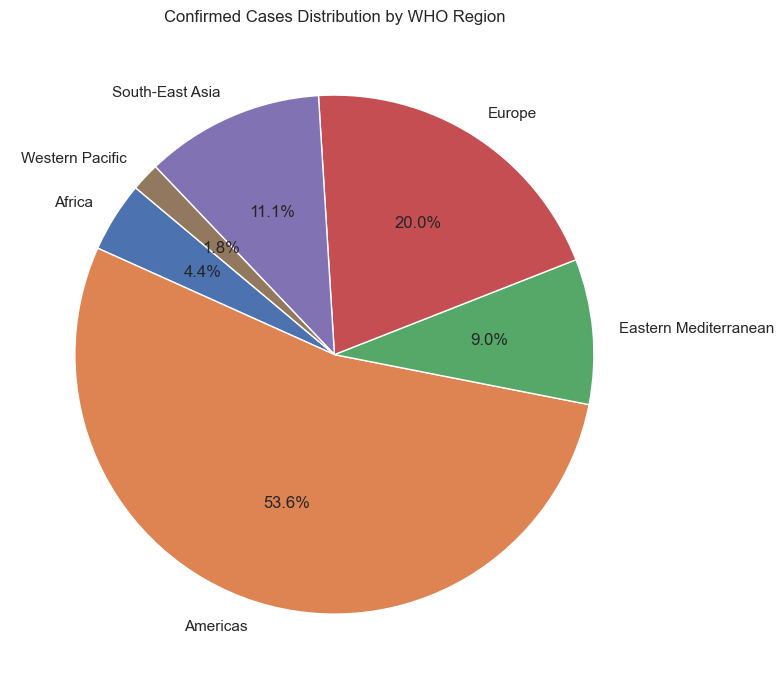

In [5]:
# 2. Pie Chart: Case distribution by WHO Region
region_cases = covid_df.groupby('WHO Region')['Confirmed'].sum()
plt.figure(figsize=(8, 8))
region_cases.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Confirmed Cases Distribution by WHO Region")
plt.ylabel("")
plt.tight_layout()
plt.show()

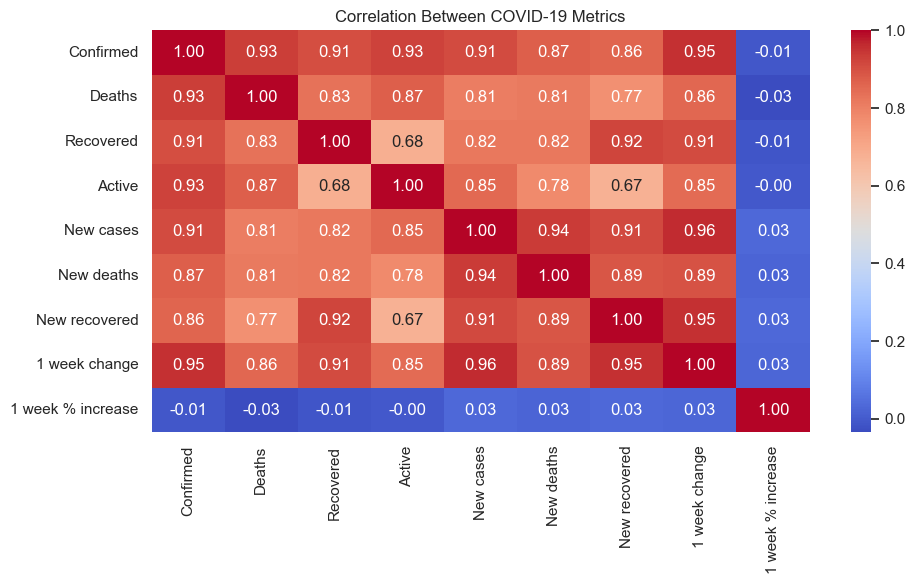

In [6]:
# 3. Correlation Heatmap
plt.figure(figsize=(10, 6))
metrics = covid_df[['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths',
                    'New recovered', '1 week change', '1 week % increase']]
sns.heatmap(metrics.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between COVID-19 Metrics")
plt.tight_layout()
plt.show()

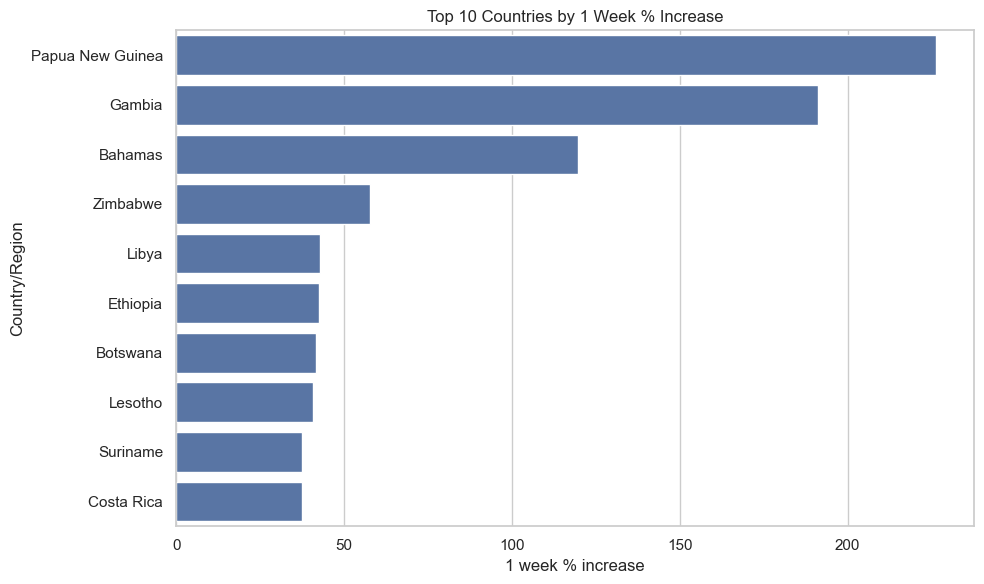

In [7]:
# 4. Growth Analysis: Top 10 countries by 1-week % increase
top_growth = covid_df.nlargest(10, '1 week % increase')
plt.figure(figsize=(10, 6))
sns.barplot(x='1 week % increase', y='Country/Region', data=top_growth)
plt.title("Top 10 Countries by 1 Week % Increase")
plt.tight_layout()
plt.show()

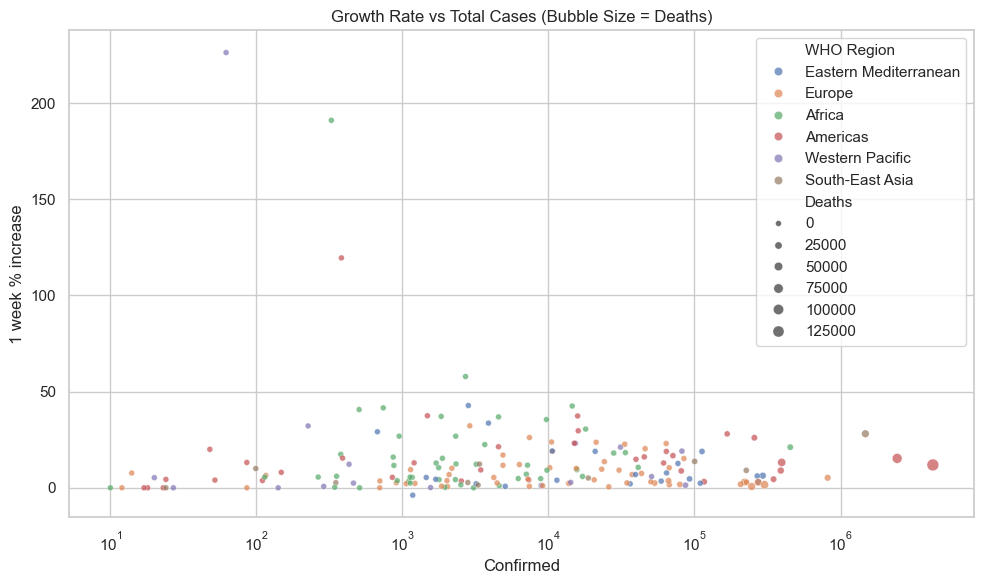

In [8]:
# 5. Bubble chart: % Growth vs Total Cases
plt.figure(figsize=(10, 6))
sns.scatterplot(data=covid_df, x='Confirmed', y='1 week % increase', size='Deaths', hue='WHO Region', alpha=0.7)
plt.xscale('log')
plt.title("Growth Rate vs Total Cases (Bubble Size = Deaths)")
plt.tight_layout()
plt.show()

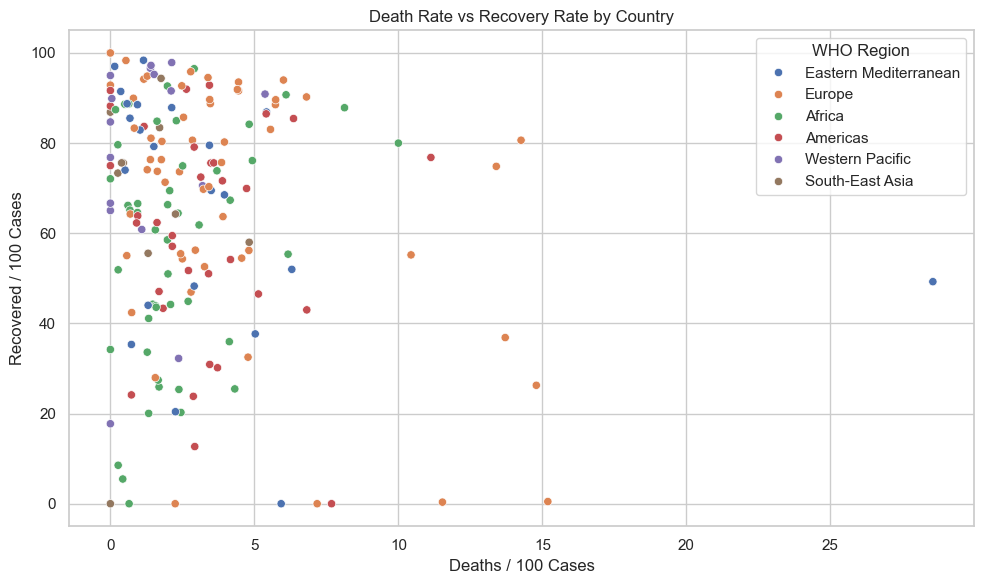

In [9]:
# 6. Death Rate vs Recovery Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=covid_df, x='Deaths / 100 Cases', y='Recovered / 100 Cases', hue='WHO Region')
plt.title("Death Rate vs Recovery Rate by Country")
plt.tight_layout()
plt.show()

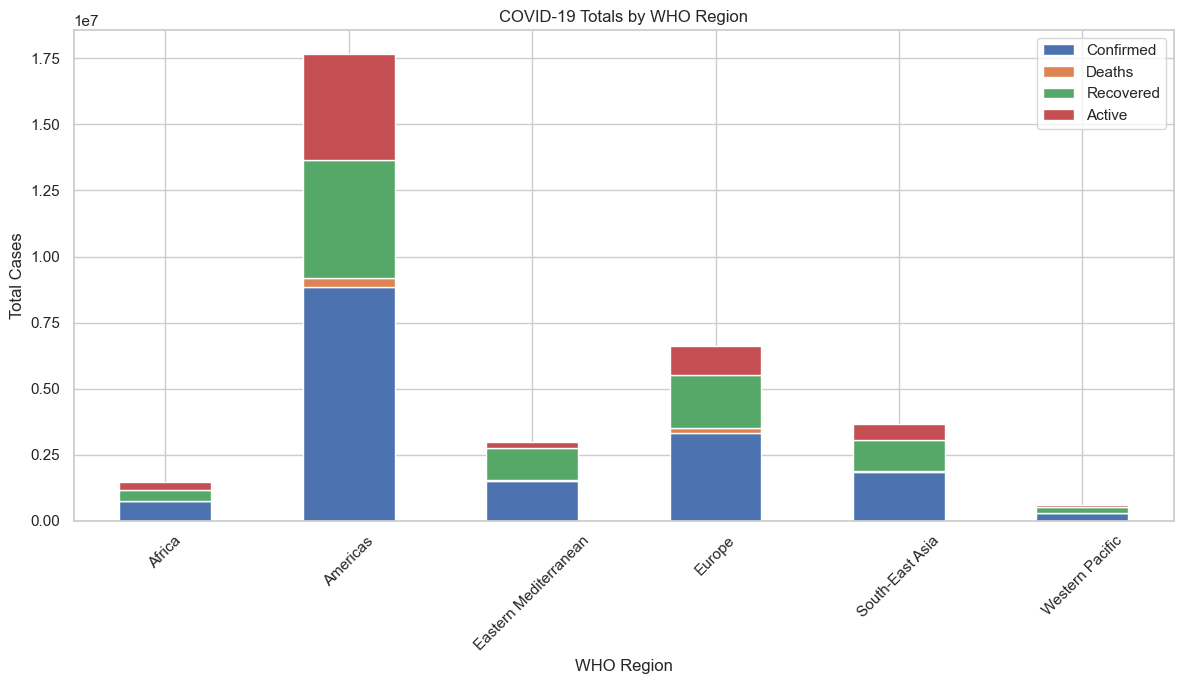

In [10]:
# 7. WHO Region-Level Summary
region_summary = covid_df.groupby('WHO Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum()
region_summary.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title("COVID-19 Totals by WHO Region")
plt.ylabel("Total Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()